<a href="https://colab.research.google.com/github/lakshmi200477/ML-Expriment/blob/main/houseprice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.3333

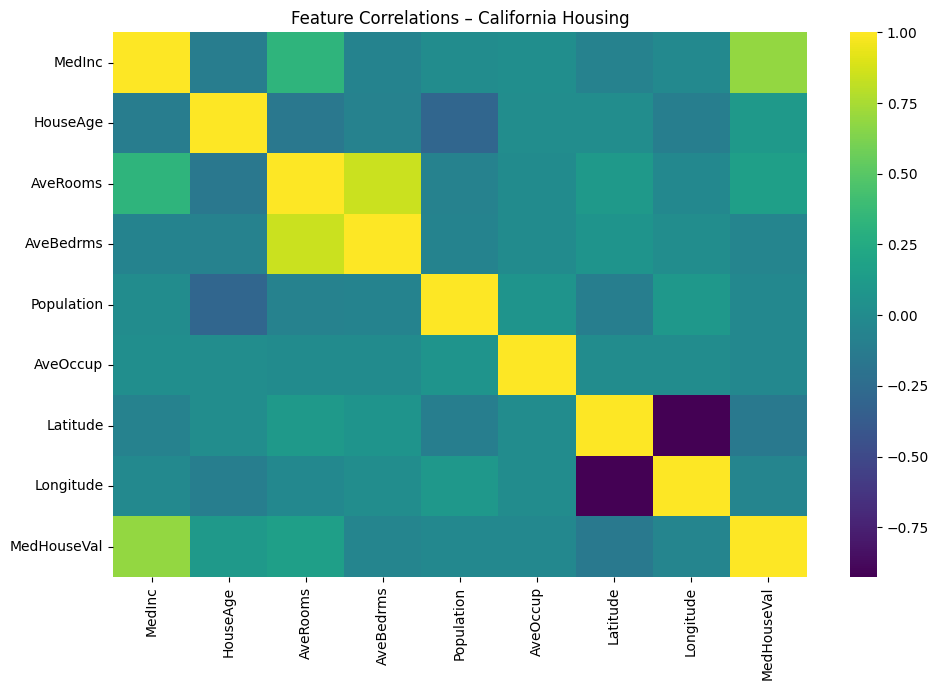

TypeError: got an unexpected keyword argument 'squared'

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 2. Load the dataset
housing = fetch_california_housing(as_frame=True)     # returns Bunch; frame in .frame
df = housing.frame                                    # full DataFrame with target column "MedHouseVal"

# 3. Quick EDA (optional – comment out if running headless)
print(df.head())
print(df.describe())

plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(numeric_only=True), cmap="viridis", annot=False)
plt.title("Feature Correlations – California Housing")
plt.tight_layout()
plt.show()

# 4. Features & target
X = df.drop(columns="MedHouseVal")
y = df["MedHouseVal"]

# 5. Train / test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# 6. Pre‑processing + model pipeline
numeric_features = X.columns.to_list()
numeric_transformer = Pipeline(
    steps=[("scaler", StandardScaler())]
)

preprocessor = ColumnTransformer(
    transformers=[("num", numeric_transformer, numeric_features)]
)

model = RandomForestRegressor(
    n_estimators=400,
    max_depth=None,
    n_jobs=-1,
    random_state=42
)

clf = Pipeline(
    steps=[("preprocess", preprocessor), ("model", model)]
)

# 7. Train
clf.fit(X_train, y_train)

# 8. Predict
y_pred = clf.predict(X_test)

# 9. Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"MAE  : {mae:.3f}")
print(f"RMSE : {rmse:.3f}")
print(f"R²   : {r2:.3f}")

# 10. Plot – Actual vs Predicted
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, edgecolors="k", alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", linewidth=2)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted – California Housing")
plt.tight_layout()
plt.show()

